# 10 Minutes to pandas

[Source](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.534377,-1.166835,0.552817,0.295235
2013-01-02,-1.168310,0.852970,-1.926660,0.271516
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852
2013-01-06,1.367584,-1.239054,-1.154439,-0.714427


Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a dict of objects that can be converted to series-like.

In [8]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) have different [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

Here is how to view the top and bottom rows of the frame:

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.534377,-1.166835,0.552817,0.295235
2013-01-02,-1.168310,0.852970,-1.926660,0.271516
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852
2013-01-06,1.367584,-1.239054,-1.154439,-0.714427


Display the index and columns

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()` gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, `DataFrame.to_numpy()` is fast and doesn’t require copying data.

In [18]:
df.to_numpy()

array([[-0.53437674, -1.16683512,  0.55281704,  0.29523502],
       [-1.1683095 ,  0.85296952, -1.92665959,  0.27151637],
       [-0.49448947, -1.7842706 , -0.12263523, -1.12159537],
       [-0.63530907, -0.26341834,  0.13719517, -0.35378752],
       [-0.77196761, -0.69878492, -1.11910468,  2.81785201],
       [ 1.36758353, -1.23905373, -1.15443949, -0.71442688]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [20]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

[`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.372811,-0.716566,-0.605471,0.199132
std,0.886671,0.925725,0.942023,1.396911
min,-1.168310,-1.784271,-1.926660,-1.121595
25%,-0.737803,-1.220999,-1.145606,-0.624267
50%,-0.584843,-0.932810,-0.620870,-0.041136
75%,-0.504461,-0.372260,0.072238,0.289305
max,1.367584,0.852970,0.552817,2.817852


Transposing your data

In [22]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.534377,-1.168310,-0.494489,-0.635309,-0.771968,1.367584
B,-1.166835,0.852970,-1.784271,-0.263418,-0.698785,-1.239054
C,0.552817,-1.926660,-0.122635,0.137195,-1.119105,-1.154439
D,0.295235,0.271516,-1.121595,-0.353788,2.817852,-0.714427


Sorting by an axis

In [23]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.295235,0.552817,-1.166835,-0.534377
2013-01-02,0.271516,-1.926660,0.852970,-1.168310
2013-01-03,-1.121595,-0.122635,-1.784271,-0.494489
2013-01-04,-0.353788,0.137195,-0.263418,-0.635309
2013-01-05,2.817852,-1.119105,-0.698785,-0.771968
2013-01-06,-0.714427,-1.154439,-1.239054,1.367584


Sorting by value

In [24]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595
2013-01-06,1.367584,-1.239054,-1.154439,-0.714427
2013-01-01,-0.534377,-1.166835,0.552817,0.295235
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788
2013-01-02,-1.168310,0.852970,-1.926660,0.271516


## Selection

>**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [25]:
df['A']

2013-01-01   -0.534377
2013-01-02   -1.168310
2013-01-03   -0.494489
2013-01-04   -0.635309
2013-01-05   -0.771968
2013-01-06    1.367584
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [26]:
df[0:3]

,A,B,C,D
2013-01-01,-0.534377,-1.166835,0.552817,0.295235
2013-01-02,-1.168310,0.852970,-1.926660,0.271516
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595


In [27]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.168310,0.852970,-1.926660,0.271516
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788


### Selection by Label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)

For getting a cross section using a label:

In [28]:
df.loc[dates[0]]

A   -0.534377
B   -1.166835
C    0.552817
D    0.295235
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.534377,-1.166835
2013-01-02,-1.168310,0.852970
2013-01-03,-0.494489,-1.784271
2013-01-04,-0.635309,-0.263418
2013-01-05,-0.771968,-0.698785
2013-01-06,1.367584,-1.239054


Showing label slicing, both endpoints are included

In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.168310,0.852970
2013-01-03,-0.494489,-1.784271
2013-01-04,-0.635309,-0.263418


Reduction in the dimensions of the returned object

In [31]:
df.loc['20130102',['A','B']]

A   -1.16831
B    0.85297
Name: 2013-01-02 00:00:00, dtype: float64

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.loc[dates[0],'A']

-0.5343767371269155

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [33]:
df.iloc[3]

A   -0.635309
B   -0.263418
C    0.137195
D   -0.353788
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [34]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.635309,-0.263418
2013-01-05,-0.771968,-0.698785


By lists of integer position locations, similar to the numpy/python style

In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.168310,-1.926660
2013-01-03,-0.494489,-0.122635
2013-01-05,-0.771968,-1.119105


For slicing rows explicitly

In [36]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.168310,0.852970,-1.926660,0.271516
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595


For slicing columns explicitly

In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.166835,0.552817
2013-01-02,0.852970,-1.926660
2013-01-03,-1.784271,-0.122635
2013-01-04,-0.263418,0.137195
2013-01-05,-0.698785,-1.119105
2013-01-06,-1.239054,-1.154439


For getting a value explicitly

In [38]:
df.iloc[1,1]

0.8529695184142756

For getting fast access to a scalar (equiv to the prior method)

In [39]:
df.iat[1,1]

0.8529695184142756

## Boolean Indexing

Using a single column’s values to select data.

In [41]:
df[df["A"] > 0]

,A,B,C,D
2013-01-06,1.367584,-1.239054,-1.154439,-0.714427


Selecting values from a DataFrame where a boolean condition is met.

In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.552817,0.295235
2013-01-02,NaN,0.85297,NaN,0.271516
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,0.137195,NaN
2013-01-05,NaN,NaN,NaN,2.817852
2013-01-06,1.367584,NaN,NaN,NaN


Using the `isin()` method for filtering:

In [43]:
df2 = df.copy()

In [44]:
df2['E'] = ['one','one', 'two','three','four','three']

In [45]:
df2

,A,B,C,D,E
2013-01-01,-0.534377,-1.166835,0.552817,0.295235,one
2013-01-02,-1.168310,0.852970,-1.926660,0.271516,one
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595,two
2013-01-04,-0.635309,-0.263418,0.137195,-0.353788,three
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852,four
2013-01-06,1.367584,-1.239054,-1.154439,-0.714427,three


In [46]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.494489,-1.784271,-0.122635,-1.121595,two
2013-01-05,-0.771968,-0.698785,-1.119105,2.817852,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [48]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [49]:
df['F'] = s1

Setting values by label

In [50]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [51]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [52]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.552817,5,NaN
2013-01-02,-1.168310,0.852970,-1.926660,5,1.0
2013-01-03,-0.494489,-1.784271,-0.122635,5,2.0
2013-01-04,-0.635309,-0.263418,0.137195,5,3.0
2013-01-05,-0.771968,-0.698785,-1.119105,5,4.0
2013-01-06,1.367584,-1.239054,-1.154439,5,5.0


A where operation with setting.

In [54]:
df2 = df.copy()

In [55]:
df2[df2 > 0] = -df2

In [56]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.552817,-5,NaN
2013-01-02,-1.168310,-0.852970,-1.926660,-5,-1.0
2013-01-03,-0.494489,-1.784271,-0.122635,-5,-2.0
2013-01-04,-0.635309,-0.263418,-0.137195,-5,-3.0
2013-01-05,-0.771968,-0.698785,-1.119105,-5,-4.0
2013-01-06,-1.367584,-1.239054,-1.154439,-5,-5.0


## Missing Data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [58]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [59]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.552817,5,NaN,1.0
2013-01-02,-1.168310,0.852970,-1.926660,5,1.0,1.0
2013-01-03,-0.494489,-1.784271,-0.122635,5,2.0,NaN
2013-01-04,-0.635309,-0.263418,0.137195,5,3.0,NaN


To drop any rows that have missing data.

In [60]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.16831,0.85297,-1.92666,5,1.0,1.0


Filling missing data

In [61]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.552817,5,5.0,1.0
2013-01-02,-1.168310,0.852970,-1.926660,5,1.0,1.0
2013-01-03,-0.494489,-1.784271,-0.122635,5,2.0,5.0
2013-01-04,-0.635309,-0.263418,0.137195,5,3.0,5.0


To get the boolean mask where values are nan

In [62]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [63]:
df.mean()

A   -0.283749
B   -0.522093
C   -0.605471
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [64]:
df.mean(1)

2013-01-01    1.388204
2013-01-02    0.751600
2013-01-03    0.919721
2013-01-04    1.447694
2013-01-05    1.282029
2013-01-06    1.794818
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [65]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [66]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.494489,-2.784271,-1.122635,4.0,1.0
2013-01-04,-3.635309,-3.263418,-2.862805,2.0,0.0
2013-01-05,-5.771968,-5.698785,-6.119105,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [68]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.552817,5,NaN
2013-01-02,-1.168310,0.852970,-1.373843,10,1.0
2013-01-03,-1.662799,-0.931301,-1.496478,15,3.0
2013-01-04,-2.298108,-1.194719,-1.359283,20,6.0
2013-01-05,-3.070076,-1.893504,-2.478387,25,10.0
2013-01-06,-1.702492,-3.132558,-3.632827,30,15.0


In [69]:
df.apply(lambda x: x.max() - x.min())

A    2.535893
B    2.637240
C    2.479477
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [70]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [71]:
s

0    2
1    6
2    6
3    0
4    1
5    6
6    3
7    0
8    4
9    3
dtype: int64

In [72]:
s.value_counts()

6    3
0    2
3    2
2    1
1    1
4    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [73]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [74]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [75]:
df = pd.DataFrame(np.random.randn(10, 4))

In [76]:
df

,0,1,2,3
0,-0.162034,0.087086,-0.142747,0.558215
1,-0.548816,-0.803596,1.334449,0.847867
2,-0.001181,1.259244,-0.325483,0.138625
3,0.880145,1.878703,0.217188,-0.343998
4,1.372847,-0.923290,-0.284173,-0.869420
5,0.399153,-1.378420,1.009660,1.317131
6,-0.657825,-1.498784,1.135572,0.450978
7,0.324518,0.125814,-0.158583,0.311181
8,1.165542,1.455108,-0.897792,0.829469
9,0.456223,1.199397,1.349931,0.146795


In [77]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [78]:
pd.concat(pieces)

,0,1,2,3
0,-0.162034,0.087086,-0.142747,0.558215
1,-0.548816,-0.803596,1.334449,0.847867
2,-0.001181,1.259244,-0.325483,0.138625
3,0.880145,1.878703,0.217188,-0.343998
4,1.372847,-0.923290,-0.284173,-0.869420
5,0.399153,-1.378420,1.009660,1.317131
6,-0.657825,-1.498784,1.135572,0.450978
7,0.324518,0.125814,-0.158583,0.311181
8,1.165542,1.455108,-0.897792,0.829469
9,0.456223,1.199397,1.349931,0.146795


>Note
>Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [79]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [80]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [81]:
left

,key,lval
0,foo,1
1,foo,2


In [82]:
right

,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [84]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [85]:
df

,A,B,C,D
0,1.867114,1.426597,0.840503,2.261433
1,-0.484687,0.435644,1.423093,0.293836
2,0.004340,-0.854240,-0.934477,0.760949
3,0.445353,1.012254,1.895479,0.606886
4,0.123227,-0.665844,-0.513377,-0.755661
5,0.094718,0.925687,-1.507613,0.084735
6,-0.508655,-0.675627,0.795865,0.981134
7,-1.617992,0.991570,-0.512536,-1.758008


In [86]:
s = df.iloc[3]

In [87]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.867114,1.426597,0.840503,2.261433
1,-0.484687,0.435644,1.423093,0.293836
2,0.004340,-0.854240,-0.934477,0.760949
3,0.445353,1.012254,1.895479,0.606886
4,0.123227,-0.665844,-0.513377,-0.755661
5,0.094718,0.925687,-1.507613,0.084735
6,-0.508655,-0.675627,0.795865,0.981134
7,-1.617992,0.991570,-0.512536,-1.758008
8,0.445353,1.012254,1.895479,0.606886


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [88]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [89]:
df

,A,B,C,D
0,foo,one,-0.197857,0.836461
1,bar,one,-1.836371,-1.672314
2,foo,two,-0.805655,-1.963117
3,bar,three,0.564109,0.004886
4,foo,two,-0.588056,0.420082
5,bar,two,0.188632,0.220741
6,foo,one,0.327255,-0.136870
7,foo,three,0.772913,-1.430266


Grouping and then applying a function sum to the resulting groups.

In [90]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.083630,-1.446687
foo,-0.491399,-2.273710


In [91]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.836371 -1.672314
    three  0.564109  0.004886
    two    0.188632  0.220741
foo one    0.129399  0.699591
    three  0.772913 -1.430266
    two   -1.393711 -1.543035

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [92]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one    -0.172437 -0.112341
      two     1.309232 -1.193736
baz   one    -0.459612 -1.163682
      two    -1.454387  0.184935

The stack() method “compresses” a level in the DataFrame’s columns.

In [97]:
stacked = df2.stack()

In [98]:
stacked

first  second   
bar    one     A   -0.172437
               B   -0.112341
       two     A    1.309232
               B   -1.193736
baz    one     A   -0.459612
               B   -1.163682
       two     A   -1.454387
               B    0.184935
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [99]:
stacked.unstack()

A         B
first second                    
bar   one    -0.172437 -0.112341
      two     1.309232 -1.193736
baz   one    -0.459612 -1.163682
      two    -1.454387  0.184935

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.172437  1.309232
      B -0.112341 -1.193736
baz   A -0.459612 -1.454387
      B -1.163682  0.184935

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.172437 -0.459612
       B -0.112341 -1.163682
two    A  1.309232 -1.454387
       B -1.193736  0.184935

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [102]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [103]:
df

,A,B,C,D,E
0,one,A,foo,0.145715,-1.022165
1,one,B,foo,-0.281787,0.478218
2,two,C,foo,-0.302780,-0.107945
3,three,A,bar,-0.581474,-0.024141
4,one,B,bar,-0.647910,-0.070459
5,one,C,bar,-0.117996,1.423829
6,two,A,foo,1.048549,-1.442322
7,three,B,foo,0.303375,-1.398654
8,one,C,foo,0.291800,-0.651896
9,one,A,bar,0.491486,-0.012319


We can produce pivot tables from this data very easily:

In [104]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.491486  0.145715
      B -0.647910 -0.281787
      C -0.117996  0.291800
three A -0.581474       NaN
      B       NaN  0.303375
      C  0.249340       NaN
two   A       NaN  1.048549
      B -2.016146       NaN
      C       NaN -0.302780

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [105]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [107]:
ts.resample('5Min').sum()

2012-01-01    25406
Freq: 5T, dtype: int64

Time zone representation

In [108]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [110]:
ts

2012-03-06    2.403731
2012-03-07    1.578758
2012-03-08   -1.412283
2012-03-09    1.585423
2012-03-10   -0.447442
Freq: D, dtype: float64

In [111]:
ts_utc = ts.tz_localize('UTC')

In [112]:
ts_utc

2012-03-06 00:00:00+00:00    2.403731
2012-03-07 00:00:00+00:00    1.578758
2012-03-08 00:00:00+00:00   -1.412283
2012-03-09 00:00:00+00:00    1.585423
2012-03-10 00:00:00+00:00   -0.447442
Freq: D, dtype: float64


Convert to another time zone

In [113]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.403731
2012-03-06 19:00:00-05:00    1.578758
2012-03-07 19:00:00-05:00   -1.412283
2012-03-08 19:00:00-05:00    1.585423
2012-03-09 19:00:00-05:00   -0.447442
Freq: D, dtype: float64


Converting between time span representations

In [114]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [115]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [116]:
ts

2012-01-31    0.415257
2012-02-29   -0.843090
2012-03-31    0.306608
2012-04-30    0.861638
2012-05-31    0.579553
Freq: M, dtype: float64

In [117]:
ps = ts.to_period()

In [118]:
ps

2012-01    0.415257
2012-02   -0.843090
2012-03    0.306608
2012-04    0.861638
2012-05    0.579553
Freq: M, dtype: float64

In [119]:
ps.to_timestamp()

2012-01-01    0.415257
2012-02-01   -0.843090
2012-03-01    0.306608
2012-04-01    0.861638
2012-05-01    0.579553
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [120]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [121]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [122]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [123]:
ts.head()

1990-03-01 09:00    2.540545
1990-06-01 09:00   -1.301051
1990-09-01 09:00    0.504866
1990-12-01 09:00    3.159323
1991-03-01 09:00   -0.520955
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [124]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [125]:
df["grade"] = df["raw_grade"].astype("category")

In [126]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [127]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [128]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [129]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [130]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [131]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [132]:
import matplotlib.pyplot as plt
plt.close("all")

In [133]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [134]:
ts = ts.cumsum()

<AxesSubplot:>

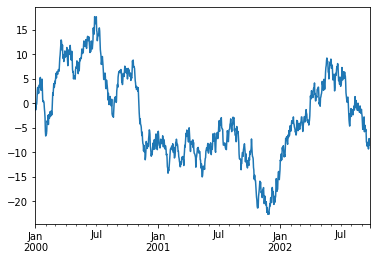

In [135]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [136]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [137]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

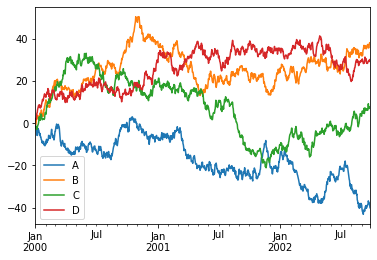

In [138]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [139]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [140]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.384817,0.513609,-1.705235,1.399450
1,2000-01-02,-1.177765,-0.886053,-1.922768,1.704903
2,2000-01-03,-2.197236,-0.092119,-1.403218,2.196858
3,2000-01-04,-2.374139,0.518876,-2.551855,1.828393
4,2000-01-05,-3.560139,2.067079,-2.901068,2.602319
...,...,...,...,...,...
995,2002-09-22,-37.367730,35.506805,7.181577,29.633260
996,2002-09-23,-37.688242,36.428275,7.138265,29.185347
997,2002-09-24,-37.739469,37.258316,7.570954,29.158169
998,2002-09-25,-38.741428,38.066170,6.919066,30.099116


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [142]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [143]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.384817,0.513609,-1.705235,1.399450
2000-01-02,-1.177765,-0.886053,-1.922768,1.704903
2000-01-03,-2.197236,-0.092119,-1.403218,2.196858
2000-01-04,-2.374139,0.518876,-2.551855,1.828393
2000-01-05,-3.560139,2.067079,-2.901068,2.602319
...,...,...,...,...
2002-09-22,-37.367730,35.506805,7.181577,29.633260
2002-09-23,-37.688242,36.428275,7.138265,29.185347
2002-09-24,-37.739469,37.258316,7.570954,29.158169
2002-09-25,-38.741428,38.066170,6.919066,30.099116


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [144]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [145]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.384817,0.513609,-1.705235,1.399450
1,2000-01-02,-1.177765,-0.886053,-1.922768,1.704903
2,2000-01-03,-2.197236,-0.092119,-1.403218,2.196858
3,2000-01-04,-2.374139,0.518876,-2.551855,1.828393
4,2000-01-05,-3.560139,2.067079,-2.901068,2.602319
...,...,...,...,...,...
995,2002-09-22,-37.367730,35.506805,7.181577,29.633260
996,2002-09-23,-37.688242,36.428275,7.138265,29.185347
997,2002-09-24,-37.739469,37.258316,7.570954,29.158169
998,2002-09-25,-38.741428,38.066170,6.919066,30.099116


### Gotchas
If you are trying an operation and you see an exception like:

In [146]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.